Firewall EDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [55]:
firewall_04062012 = pd.read_csv('HW4/Firewall/Firewall-04062012.csv',low_memory=False)
firewall_04072012 = pd.read_csv('HW4/Firewall/Firewall-04072012.csv',low_memory=False)

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source hostname,Destination hostname,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down
0,05/Apr/2012 17:51:26,Info,Teardown,ASA-6-302016,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,(empty),0,1
1,05/Apr/2012 17:51:26,Info,Built,ASA-6-302015,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,outbound,1,0
2,05/Apr/2012 17:53:06,Info,Built,ASA-6-302015,UDP,172.23.0.10,198.32.64.12,(empty),(empty),64048,53,domain,outbound,1,0
3,05/Apr/2012 17:53:10,Info,Built,ASA-6-302015,UDP,172.23.0.10,202.12.27.33,(empty),(empty),64048,53,domain,outbound,1,0
4,05/Apr/2012 17:53:14,Info,Built,ASA-6-302015,UDP,172.23.0.10,128.9.0.107,(empty),(empty),64048,53,domain,outbound,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13208228,06/Apr/2012 17:20:53,Info,Built,ASA-6-302013,TCP,172.23.21.96,10.32.0.100,(empty),(empty),4346,80,http,outbound,1,0
13208229,06/Apr/2012 17:20:53,Info,Built,ASA-6-302013,TCP,172.23.41.127,10.32.0.100,(empty),(empty),4370,80,http,outbound,1,0
13208230,06/Apr/2012 17:20:53,Info,Teardown,ASA-6-302014,TCP,172.23.21.96,10.32.0.100,(empty),(empty),4346,80,http,outbound,0,1
13208231,06/Apr/2012 17:20:53,Info,Teardown,ASA-6-302014,TCP,172.23.41.127,10.32.0.100,(empty),(empty),4370,80,http,outbound,0,1


In [65]:
firewall_04062012['Operation'].unique()

array(['Teardown', 'Built', '(empty)', 'Command executed', 'Deny',
       'Deny by ACL'], dtype=object)

In [66]:
firewall_04072012['Operation'].unique()

array(['Built', 'Teardown', 'Deny', '(empty)', 'Command executed'],
      dtype=object)

In [56]:
firewall_04062012['Date/time'] = pd.to_datetime(firewall_04062012['Date/time'], format='%d/%b/%Y %H:%M:%S')
firewall_04062012.set_index('Date/time', inplace=True)
firewall_04062012

,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source hostname,Destination hostname,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down
Date/time,,,,,,,,,,,,,,
2012-04-05 17:51:26,Info,Teardown,ASA-6-302016,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,(empty),0,1
2012-04-05 17:51:26,Info,Built,ASA-6-302015,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,outbound,1,0
2012-04-05 17:53:06,Info,Built,ASA-6-302015,UDP,172.23.0.10,198.32.64.12,(empty),(empty),64048,53,domain,outbound,1,0
2012-04-05 17:53:10,Info,Built,ASA-6-302015,UDP,172.23.0.10,202.12.27.33,(empty),(empty),64048,53,domain,outbound,1,0
2012-04-05 17:53:14,Info,Built,ASA-6-302015,UDP,172.23.0.10,128.9.0.107,(empty),(empty),64048,53,domain,outbound,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-06 17:20:53,Info,Built,ASA-6-302013,TCP,172.23.21.96,10.32.0.100,(empty),(empty),4346,80,http,outbound,1,0
2012-04-06 17:20:53,Info,Built,ASA-6-302013,TCP,172.23.41.127,10.32.0.100,(empty),(empty),4370,80,http,outbound,1,0
2012-04-06 17:20:53,Info,Teardown,ASA-6-302014,TCP,172.23.21.96,10.32.0.100,(empty),(empty),4346,80,http,outbound,0,1


In [61]:
firewall_04072012['Date/time'] = pd.to_datetime(firewall_04072012['Date/time'], format='%d/%b/%Y %H:%M:%S')
firewall_04072012.set_index('Date/time', inplace=True)
firewall_04072012


,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source hostname,Destination hostname,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down
Date/time,,,,,,,,,,,,,,
2012-04-06 17:40:02,Info,Built,ASA-6-302015,UDP,172.23.0.10,128.8.10.90,(empty),(empty),64048,53,domain,outbound,1,0
2012-04-06 17:40:11,Info,Teardown,ASA-6-302014,TCP,172.23.238.72,10.32.5.51,(empty),(empty),49146,6667,6667_tcp,(empty),0,1
2012-04-06 17:40:11,Info,Teardown,ASA-6-302014,TCP,172.23.238.71,10.32.5.56,(empty),(empty),49150,6667,6667_tcp,(empty),0,1
2012-04-06 17:40:11,Info,Teardown,ASA-6-302014,TCP,172.23.238.75,10.32.5.54,(empty),(empty),49151,6667,6667_tcp,(empty),0,1
2012-04-06 17:40:23,Info,Built,ASA-6-302013,TCP,172.23.238.125,10.32.5.57,(empty),(empty),49176,80,http,outbound,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-07 09:00:04,Info,Teardown,ASA-6-302014,TCP,172.23.240.125,10.32.5.58,(empty),(empty),23110,80,http,outbound,0,1
2012-04-07 09:00:04,Info,Built,ASA-6-302013,TCP,172.23.240.34,10.32.5.57,(empty),(empty),23113,80,http,outbound,1,0
2012-04-07 09:00:04,Info,Deny,ASA-6-106015,TCP,172.23.89.210,10.32.0.100,(empty),(empty),3421,80,http,(empty),0,0


In [57]:
stacked_activity_trend_0406 = firewall_04062012.groupby([firewall_04062012.index, 'Operation']).size().unstack(fill_value=0)
stacked_activity_trend_0406 = stacked_activity_trend_0406.resample('5Min').sum()
stacked_activity_trend_0406

Operation,(empty),Built,Command executed,Deny,Deny by ACL,Teardown
Date/time,,,,,,
2012-04-05 17:50:00,0,9,0,0,0,1
2012-04-05 17:55:00,1,3,0,0,0,11
2012-04-05 18:00:00,0,2,0,0,0,2
2012-04-05 18:05:00,1,14,0,0,0,6
2012-04-05 18:10:00,0,6,0,0,0,14
...,...,...,...,...,...,...
2012-04-06 17:00:00,0,5103,0,274,0,5100
2012-04-06 17:05:00,1,4591,0,280,0,4595
2012-04-06 17:10:00,0,4215,0,289,0,4215


In [62]:
stacked_activity_trend_0407 = firewall_04072012.groupby([firewall_04072012.index, 'Operation']).size().unstack(fill_value=0)
stacked_activity_trend_0407 = stacked_activity_trend_0407.resample('5Min').sum()
stacked_activity_trend_0407

Operation,(empty),Built,Command executed,Deny,Teardown
Date/time,,,,,
2012-04-06 17:40:00,17,205,3,55,209
2012-04-06 17:45:00,69,216,4,61,216
2012-04-06 17:50:00,2,212,0,80,212
2012-04-06 17:55:00,3,249,0,72,248
2012-04-06 18:00:00,0,221,0,88,222
...,...,...,...,...,...
2012-04-07 08:40:00,1,25708,0,1809,25681
2012-04-07 08:45:00,0,25912,0,1867,25938
2012-04-07 08:50:00,1,25750,0,1485,25771


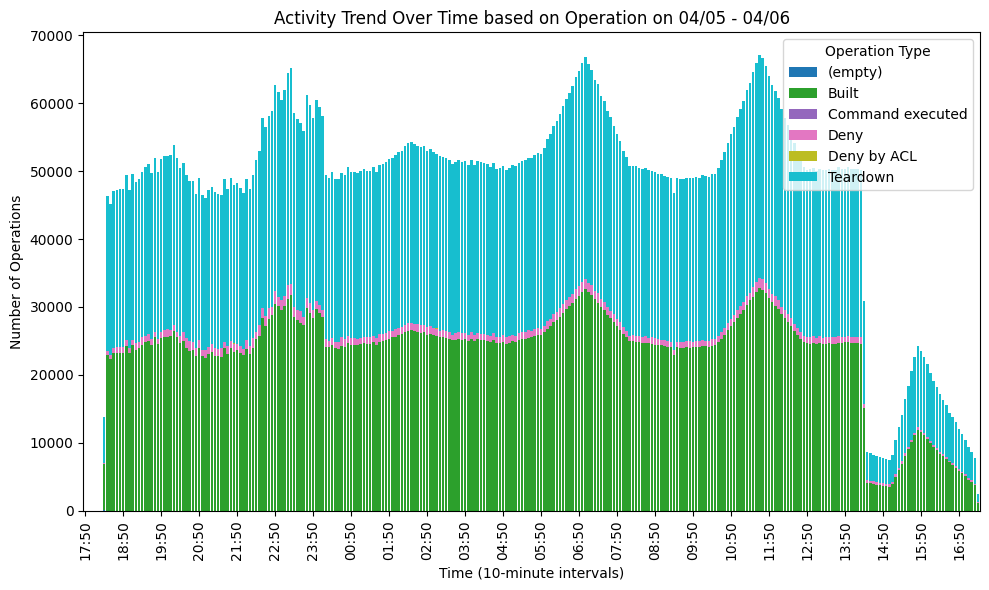

In [74]:
ax = stacked_activity_trend_0406.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 6))

# Adding labels and title
plt.title('Activity Trend Over Time based on Operation on 04/05 - 04/06')
plt.xlabel('Time (10-minute intervals)')
plt.ylabel('Number of Operations')

ax.set_xticks(range(0, len(stacked_activity_trend_0406), 12))  # Set ticks to every 60 minutes (6 * 10 min)
ax.set_xticklabels(stacked_activity_trend_0406.index[::12].strftime('%H:%M'), rotation=90)  # Format the tick labels

plt.legend(title='Operation Type')
plt.tight_layout()
plt.show()

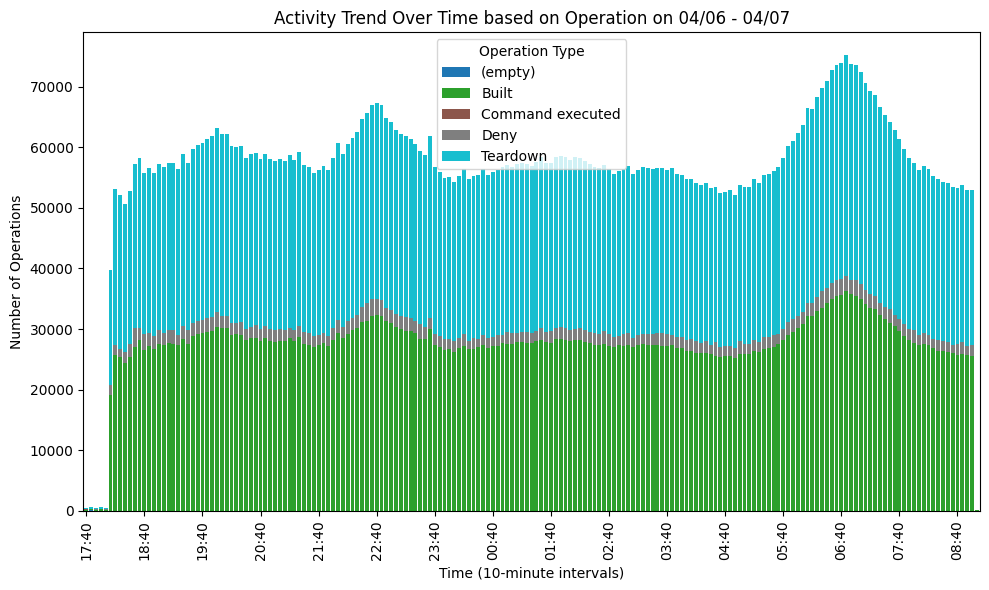

In [76]:
ax = stacked_activity_trend_0407.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 6))

# Adding labels and title
plt.title('Activity Trend Over Time based on Operation on 04/06 - 04/07')
plt.xlabel('Time (10-minute intervals)')
plt.ylabel('Number of Operations')

ax.set_xticks(range(0, len(stacked_activity_trend_0407), 12))  # Set ticks to every 60 minutes (6 * 10 min)
ax.set_xticklabels(stacked_activity_trend_0407.index[::12].strftime('%H:%M'), rotation=90)  # Format the tick labels

plt.legend(title='Operation Type')
plt.tight_layout()
plt.show()